<a href="https://colab.research.google.com/github/jarmstrong22/IDS/blob/main/HW6/Project6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: **Project6_Python**
#Author: Jaden
#Date: 12/11/2023
Data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv



In [24]:
# Import necessary libraries

import pandas as pd
import numpy as np
!pip install --upgrade scikit-learn

In [25]:
# Read in adult training data frame
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [26]:
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


# Data Cleansing
First things first, is data cleansing

In [27]:
# get some information about the columns in the dataframe
adultDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [28]:
# No null values were found from .info() but there still may be noise
adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [29]:
# Replace zeros with NaN in 'capital-gain' and 'capital-loss' columns
# adultDF['capital-gain'].replace(0, pd.NA, inplace=True)
for col in ['capital-gain', 'capital-loss']:
    non_zero_values = adultDF[adultDF[col] != 0][col]
    mean = non_zero_values.mean()
    adultDF[col] = adultDF[col].apply(lambda x: mean if x == 0 else x)
adultDF['capital-loss'].replace(0, pd.NA, inplace=True)

# Calculate the mean of non-zero values in 'capital-gain' and 'capital-loss'
mean_capital_gain = adultDF['capital-gain'].mean()
mean_capital_loss = adultDF['capital-loss'].mean()

# Impute NaN values with the respective means
adultDF['capital-gain'].fillna(mean_capital_gain, inplace=True)
adultDF['capital-loss'].fillna(mean_capital_loss, inplace=True)

adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,12810.233766,1877.836676
std,13.678875,2.598297,6333.657929,81.199257
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,12810.233766,1877.836676
50%,37.000000,10.000000,12810.233766,1877.836676
75%,48.000000,12.000000,12810.233766,1877.836676
max,90.000000,16.000000,99999.000000,4356.000000


In [30]:
for col in ['capital-gain', 'capital-loss']:
    std = adultDF[col].std()
    mean = adultDF[col].mean()

    # Define the lower threshold as 3 standard deviations below the mean
    lower_threshold = mean + 3 * std

    # Replace values below the lower threshold with the mean
    adultDF[col] = adultDF[col].apply(lambda x: mean if x > lower_threshold else x)

adultDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,12394.057280,1873.571287
std,13.678875,2.598297,2063.724075,55.200277
min,17.000000,1.000000,114.000000,213.000000
25%,28.000000,9.000000,12810.233766,1877.836676
50%,37.000000,10.000000,12810.233766,1877.836676
75%,48.000000,12.000000,12810.233766,1877.836676
max,90.000000,16.000000,27828.000000,2080.000000


In [31]:
# Calculate the mean and standard deviation of the 'education' column
mean_education = adultDF['education'].mean()
std_education = adultDF['education'].std()

# Define the lower and upper thresholds as 3 standard deviations from the mean
lower_thresholdED = mean_education - 3 * std_education
upper_thresholdED = mean_education + 3 * std_education

# Impute values below the lower threshold with the mean
adultDF.loc[adultDF['education'] < lower_thresholdED, 'education'] = mean_education

# Impute values above the upper threshold with the mean
adultDF.loc[adultDF['education'] > upper_thresholdED, 'education'] = mean_education

In [32]:

# Count the number of values below the lower threshold
count_below_threshold = len(adultDF[adultDF['education'] < lower_thresholdED])

print(f"Number of values below 3 std of the mean in 'education': {count_below_threshold}")

Number of values below 3 std of the mean in 'education': 0


This handles all the data cleansing for the non-categorical value fields. Because of errors when using the original name of marital status, 'marital-status' I am renaming the column name to avoid this issue

In [33]:
# Rename the 'marital-status' column to 'maritalstatus'
adultDF.rename(columns={'marital-status': 'maritalstatus'}, inplace=True)

# 'marital-status' column is now renamed to 'maritalstatus'

In [34]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)

,capital-gains-losses,income
0,14688.070442,<=50K
1,14688.070442,<=50K
2,14688.070442,<=50K
3,14688.070442,>50K
4,15961.836676,>50K
5,14688.070442,>50K
6,14688.070442,<=50K
7,14852.233766,<=50K
8,14688.070442,>50K
9,14688.070442,<=50K


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]

encoded_adultDF.head(10)

,capital-gains-losses,income
0,14688.070442,0
1,14688.070442,0
2,14688.070442,0
3,14688.070442,1
4,15961.836676,1
5,14688.070442,1
6,14688.070442,0
7,14852.233766,0
8,14688.070442,1
9,14688.070442,0


In [36]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [37]:
# The CART tree; try different values for max_depth and max_leaf_nodes
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)


<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

[Text(0.7142857142857143, 0.9, 'capital-gains-losses <= 14692.652\ngini = 0.365\nsamples = 11837\nvalue = [8994, 2843]\nclass = low_income'),
 Text(0.5714285714285714, 0.7, 'capital-gains-losses <= 12753.035\ngini = 0.337\nsamples = 11374\nvalue = [8939, 2435]\nclass = low_income'),
 Text(0.42857142857142855, 0.5, 'capital-gains-losses <= 6973.337\ngini = 0.5\nsamples = 712\nvalue = [366, 346]\nclass = low_income'),
 Text(0.2857142857142857, 0.3, 'capital-gains-losses <= 4925.837\ngini = 0.256\nsamples = 405\nvalue = [344, 61]\nclass = low_income'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 163\nvalue = [163, 0]\nclass = low_income'),
 Text(0.42857142857142855, 0.1, 'gini = 0.377\nsamples = 242\nvalue = [181, 61]\nclass = low_income'),
 Text(0.5714285714285714, 0.3, 'gini = 0.133\nsamples = 307\nvalue = [22, 285]\nclass = hi_income'),
 Text(0.7142857142857143, 0.5, 'gini = 0.315\nsamples = 10662\nvalue = [8573, 2089]\nclass = low_income'),
 Text(0.8571428571428571, 0.7, 'g

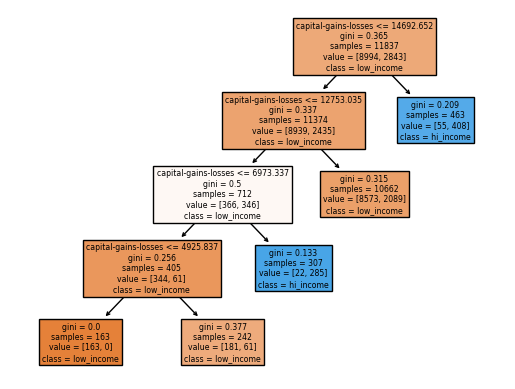

In [38]:
# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(),
                                class_names=cn,
                                filled = True)

In [39]:
# Print the text version of the tree
text_representation = tree.export_text(cart_classifier,
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- capital-gains-losses <= 14692.65
|   |--- capital-gains-losses <= 12753.04
|   |   |--- capital-gains-losses <= 6973.34
|   |   |   |--- capital-gains-losses <= 4925.84
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  4925.84
|   |   |   |   |--- class: 0
|   |   |--- capital-gains-losses >  6973.34
|   |   |   |--- class: 1
|   |--- capital-gains-losses >  12753.04
|   |   |--- class: 0
|--- capital-gains-losses >  14692.65
|   |--- class: 1



In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [41]:
# Function to create Decision Tree model
def makeDTModel(criterion, X_train, y_train):
  model = DecisionTreeClassifier(criterion=criterion, random_state=42)
  model.fit(X_train, y_train)
  return model

# Function to display a decision tree
def displayTree(classifier, X):
  plt.figure(figsize=(15, 10))
  plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=['<=50K', '>50K'])
  plt.show()

# Function to display confusion matrix and accuracy
def displayCM(classifier, X_train, y_train, X_test, y_test):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)

  train_accuracy = round((y_train == y_train_pred).mean(), 4)
  test_accuracy = round((y_test == y_test_pred).mean(), 4)

  print(f'Training Accuracy: {train_accuracy:.4f}')
  print(f'Testing Accuracy: {test_accuracy:.4f}')

  # Plot confusion matrix heatmap
  # Plot confusion matrix heatmap
  cm_train = confusion_matrix(y_train, y_train_pred)  # removed labels argument
  cm_test = confusion_matrix(y_test, y_test_pred)  # removed labels argument


  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
  plt.title('Confusion Matrix - Training Set')

  plt.subplot(1, 2, 2)
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
  plt.title('Confusion Matrix - Testing Set')

  plt.show()


# Function to compare models
def compareModels(cart_classifier, c5_classifier, X_test, y_test):
  plt.figure(figsize=(10, 6))

  # Plot ROC curve for CART Classifier
  fpr_cart, tpr_cart, _ = roc_curve(y_test, cart_classifier.predict_proba(X_test)[:, 1])
  roc_auc_cart = auc(fpr_cart, tpr_cart)
  plt.plot(fpr_cart, tpr_cart, color='darkorange', lw=2, label=f'CART (AUC = {roc_auc_cart:.2f})')

  # Plot ROC curve for C5 Classifier
  fpr_c5, tpr_c5, _ = roc_curve(y_test, c5_classifier.predict_proba(X_test)[:, 1])
  roc_auc_c5 = auc(fpr_c5, tpr_c5)
  plt.plot(fpr_c5, tpr_c5, color='green', lw=2, label=f'C5 (AUC = {roc_auc_c5:.2f})')

  # Plotting details
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

  plt.show()

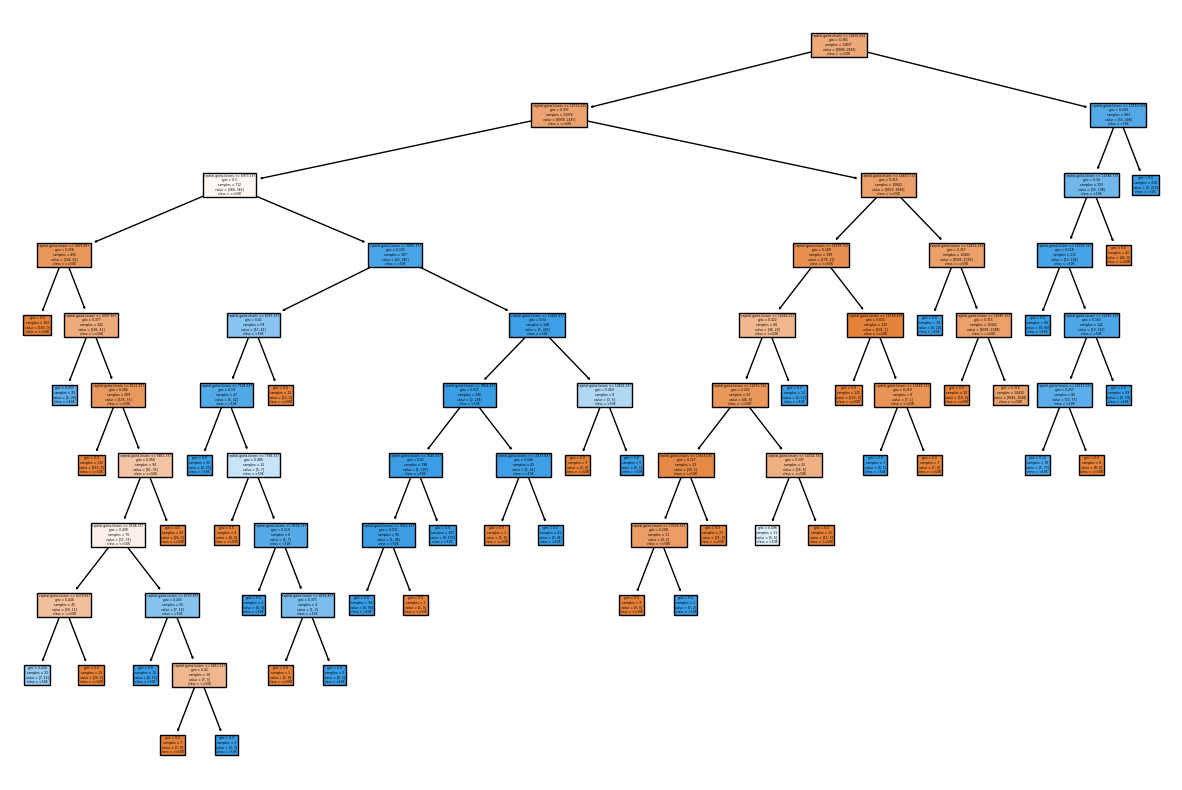

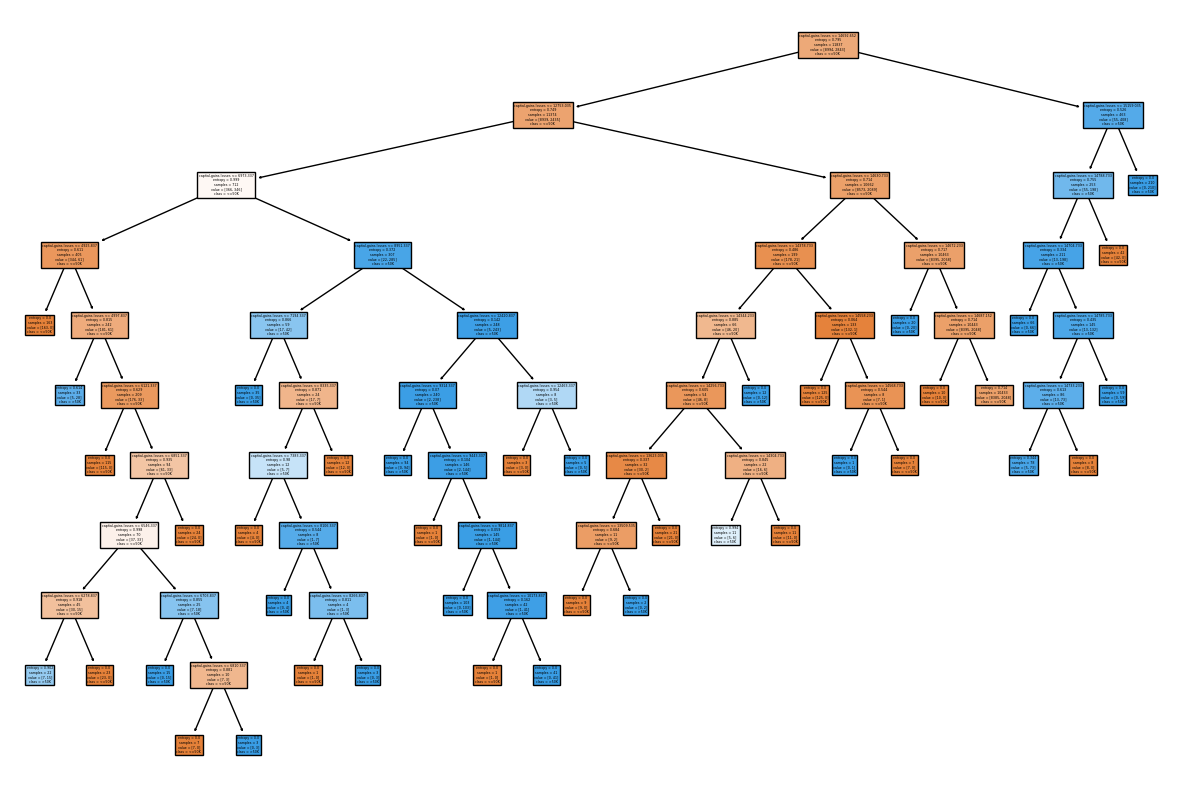

Training Accuracy: 0.8251
Testing Accuracy: 0.8196


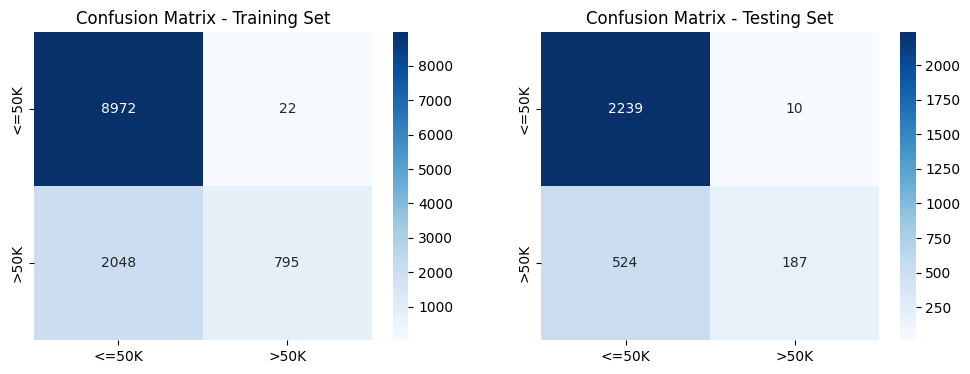

Training Accuracy: 0.8251
Testing Accuracy: 0.8196


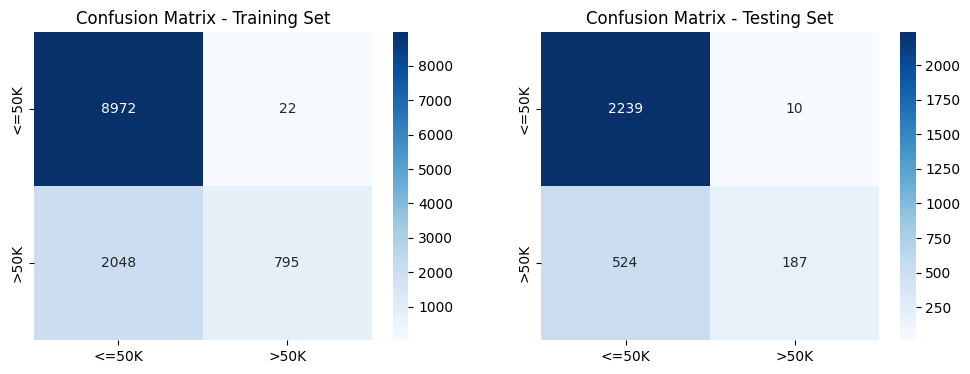

In [42]:
# Example usage
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

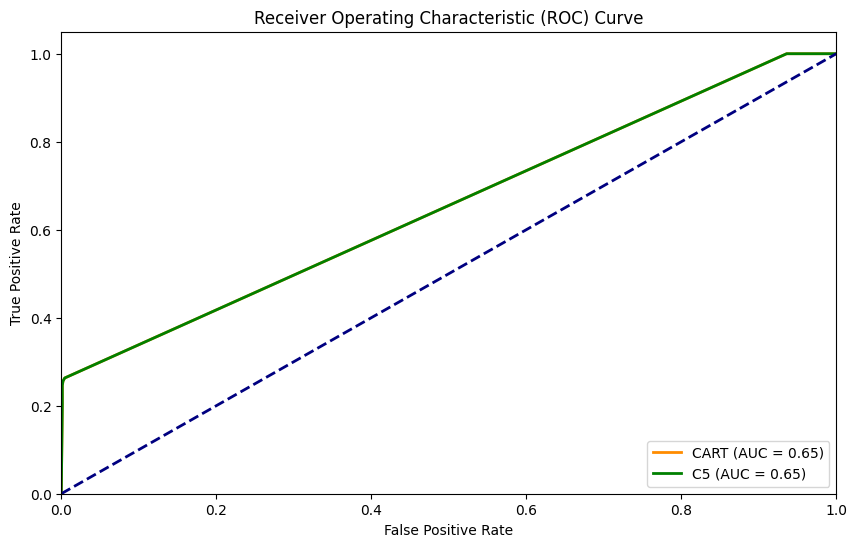

In [43]:
compareModels(cart_classifier, c5_classifier, X_test, y_test)

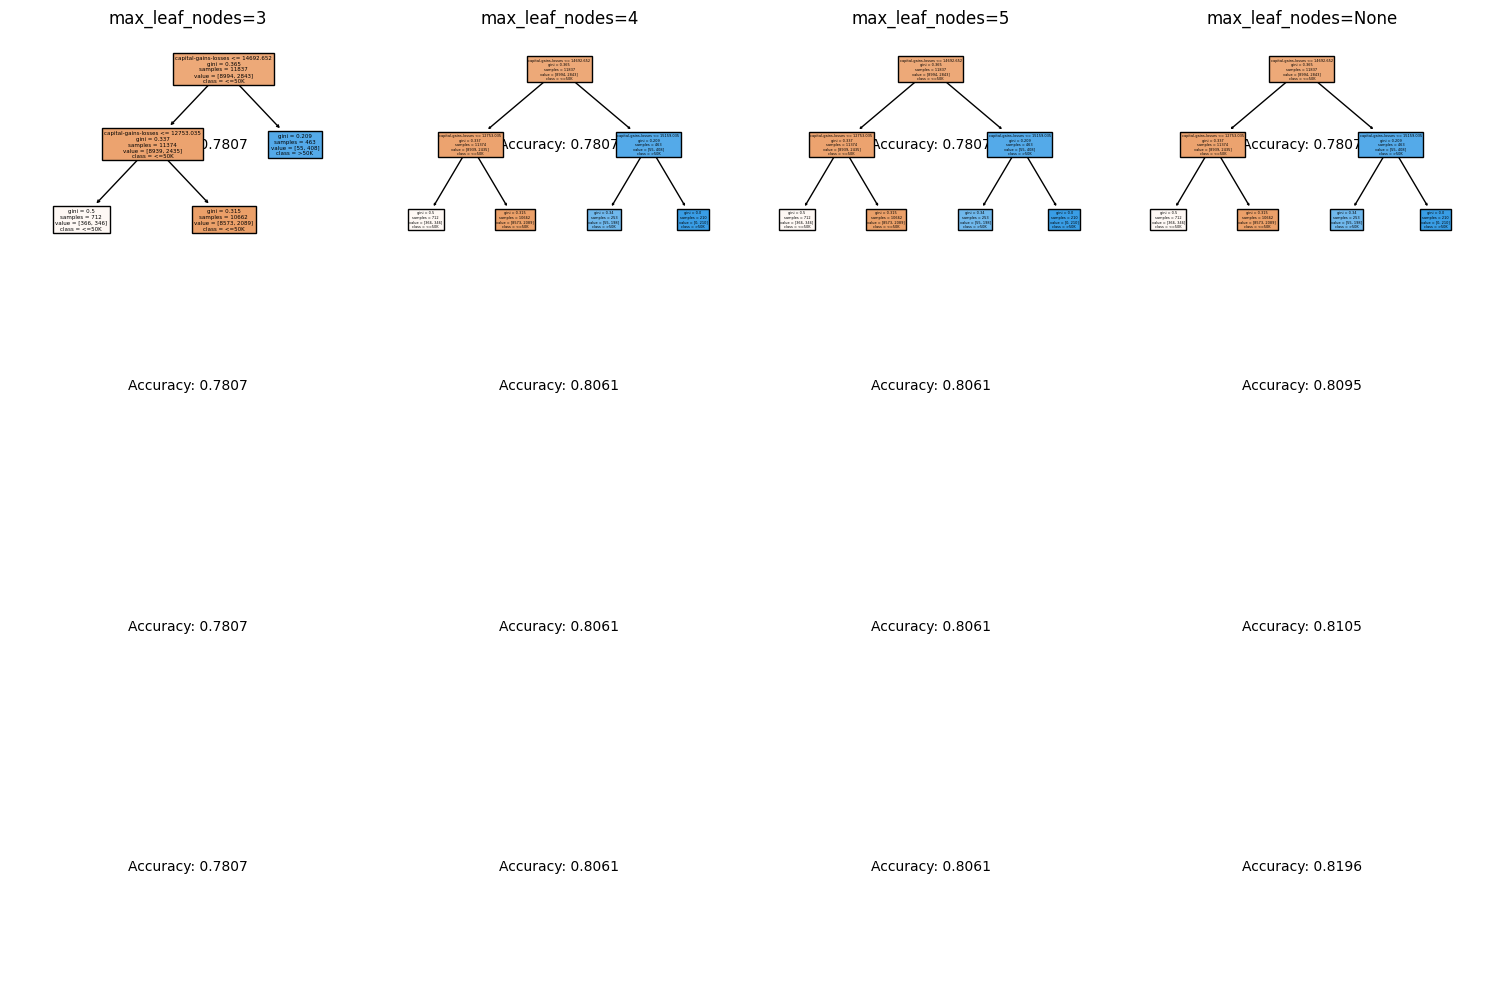

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Define different values for max_depth and max_leaf_nodes
max_depth_values = [2, 3, 4, None]
max_leaf_nodes_values = [3, 4, 5, None]

# Create a grid for plotting
fig, axes = plt.subplots(len(max_depth_values), len(max_leaf_nodes_values), figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = np.array(axes).reshape(len(max_depth_values), len(max_leaf_nodes_values))

# Iterate over different combinations of max_depth and max_leaf_nodes
for i, max_depth in enumerate(max_depth_values):
    for j, max_leaf_nodes in enumerate(max_leaf_nodes_values):
        # Create and train the decision tree model
        model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        model.fit(X_train, y_train)

        # Evaluate accuracy on the test set
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)

        # Plot decision tree for the first row
        if i == 0:
            plot_tree(model, filled=True, feature_names=list(X.columns), class_names=['<=50K', '>50K'], ax=axes[i, j])

        # Plot accuracy values
        axes[i, j].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}", ha='center', va='center', fontsize=10)
        axes[i, j].axis('off')

# Set common labels
for ax, max_leaf_nodes in zip(axes[0], max_leaf_nodes_values):
    ax.set_title(f"max_leaf_nodes={max_leaf_nodes}")

for ax, max_depth in zip(axes[:, 0], max_depth_values):
    ax.set_ylabel(f"max_depth={max_depth}")

plt.tight_layout()
plt.show()

This analysis examined the impact of max_depth and max_leaf_nodes on decision tree classification accuracy. With increasing max_depth, training accuracy improved, nearing 100% for higher values. However, testing accuracy might plateau or decrease, indicating potential overfitting. The optimal max_depth is a balance between capturing patterns and preventing overfitting. Similarly, elevating max_leaf_nodes improved training accuracy, but testing accuracy might stabilize or slightly decrease, emphasizing the need for balance. Model comparison using different criteria (gini and entropy) revealed varied performances. Visualization of decision trees and text representation provided insights into each model's structure and decision-making process.